<a href="https://colab.research.google.com/github/SpaceClover/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
9import numpy as py
import tensorflow as tf
from tensorflow.keras import datasets, layers, models?y
from sklearn.metrics import classification_report
import matplotlib.pyplot as mlib

In [7]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [12]:
train_y = train_y.reshape(-1,)
test_y = test_y.reshape(-1,)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(x, y, index):
    mlib.figure(figsize = (15,2))
    mlib.imshow(x[index])
    mlib.xlabel(classes[y[index]])

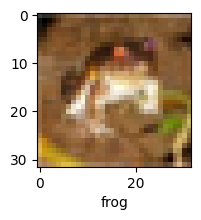

In [13]:
plot_sample(train_x, train_y, 0)

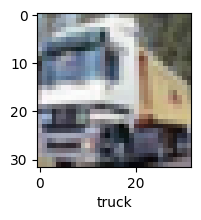

In [14]:
plot_sample(train_x, train_y, 1)

In [15]:
train_x, test_x = train_x / 255.0, test_x / 255.0

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(train_x, train_y, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.3369 - loss: 1.7848
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.5749 - loss: 1.1982
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6421 - loss: 1.0159
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.6819 - loss: 0.9030
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.7171 - loss: 0.8148
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7356 - loss: 0.7543
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.7579 - loss: 0.6995
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7743 - loss: 0.6469
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.7910 - loss: 0.5974
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7991 - loss: 0.5716


In [19]:
cnn.evaluate(test_x,test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7209 - loss: 0.8669


[0.875368058681488, 0.717199981212616]

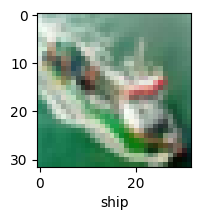

In [22]:
plot_sample(test_x, test_y, 15)

In [24]:
predictions = cnn.predict(test_x)
print("Predictions = \n", predictions[:5])
print("Test Y = \n", test_y[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Predictions = 
 [[3.98184493e-05 1.09028806e-05 3.40104080e-03 8.28255892e-01
  1.06639491e-04 1.66575462e-01 4.07086394e-04 8.88076203e-04
  3.13817203e-04 1.31193963e-06]
 [2.21656617e-02 1.30627155e-01 1.24465987e-06 5.10005930e-06
  4.75617625e-08 8.15349743e-09 1.06847904e-06 1.48830503e-08
  8.46506357e-01 6.93402311e-04]
 [5.68629019e-02 6.36524633e-02 1.03913371e-04 9.38145968e-04
  1.54380323e-04 2.37218865e-05 4.39626165e-04 5.14209823e-05
  8.34829748e-01 4.29436788e-02]
 [8.25218379e-01 1.86579395e-03 5.86423837e-03 2.44681514e-03
  4.52590466e-05 7.65796940e-05 2.91357719e-04 1.18610194e-04
  1.64005756e-01 6.71332964e-05]
 [1.04749619e-04 9.58566034e-07 1.25495091e-01 1.24494629e-02
  3.14271808e-01 1.26613013e-03 5.46315789e-01 2.28075824e-05
  7.11117391e-05 2.11841734e-06]]
Test Y = 
 [3 8 8 0 6]


In [27]:
y_class = [py.argmax(element) for element in predictions]
print(y_class[:5])

[3, 8, 8, 0, 6]
